In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

-------------------------------------------------------------------------------------------------------------------
Data Collection and Preprocessing

In [116]:
train_data = pd.read_csv('train.csv')

In [117]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
train_data = train_data.select_dtypes(include=['int64','float64']).dropna()

In [119]:
x_train = train_data.drop(columns=['SalePrice'], axis=1)

In [120]:
#x_train = x_train.select_dtypes(include=['int64','float64']).dropna()

In [121]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 18  BsmtHalf

In [122]:
y_train = pd.DataFrame(train_data['SalePrice'])
y_train.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [123]:
y_train = y_train.dropna()

In [124]:
x_train.shape

(1121, 37)

In [125]:
y_train.shape

(1121, 1)

In [126]:
test_data = pd.read_csv('test.csv')
x_test = test_data.select_dtypes(include=['int64','float64']).dropna()
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1146 non-null   int64  
 1   MSSubClass     1146 non-null   int64  
 2   LotFrontage    1146 non-null   float64
 3   LotArea        1146 non-null   int64  
 4   OverallQual    1146 non-null   int64  
 5   OverallCond    1146 non-null   int64  
 6   YearBuilt      1146 non-null   int64  
 7   YearRemodAdd   1146 non-null   int64  
 8   MasVnrArea     1146 non-null   float64
 9   BsmtFinSF1     1146 non-null   float64
 10  BsmtFinSF2     1146 non-null   float64
 11  BsmtUnfSF      1146 non-null   float64
 12  TotalBsmtSF    1146 non-null   float64
 13  1stFlrSF       1146 non-null   int64  
 14  2ndFlrSF       1146 non-null   int64  
 15  LowQualFinSF   1146 non-null   int64  
 16  GrLivArea      1146 non-null   int64  
 17  BsmtFullBath   1146 non-null   float64
 18  BsmtHalf

------------------------------------------------------------------------------------------------------------------
Linear Regression Model

In [127]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print("r2_score:", r2)

r2_score: 0.8095558023576825


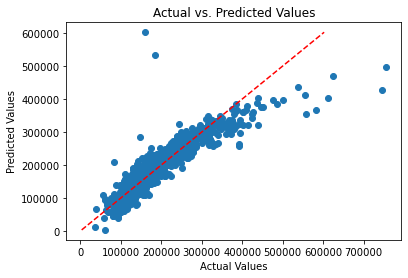

In [128]:
plt.scatter(y_train, y_pred)
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--')  # Line of best fit
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [129]:
y_pred = lr.predict(x_test)

In [130]:
print("predicted values:\n", y_pred)

predicted values:
 [[117706.22457225]
 [110072.26690167]
 [172769.60412765]
 ...
 [ 56425.60652424]
 [166318.34419451]
 [257641.81074099]]


------------------------------------------------------------------------------------------------------
Logistic Regression Model

In [131]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

r2 = r2_score(y_train, y_pred)
print("r2_score:", r2)

C:\Users\Spandana\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


r2_score: 0.6220216459272282


C:\Users\Spandana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
y_pred = model.predict(x_test)
y_pred

array([129000, 164900, 160000, ..., 125500, 160000, 125500], dtype=int64)

-------------------------------------------------------------------------------------------------------------
Polynomial Curve Fitting

In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly,y_train)

x_fit = x_train
x_fit_poly = poly.transform(x_fit)
y_pred = model.predict(x_fit_poly)

r2 = r2_score(y_train, y_pred)
print("r2_score:", r2)

r2_score: 0.9723163299517129


In [134]:
x_fit = x_test
x_fit_poly = poly.transform(x_fit)
y_pred = model.predict(x_fit_poly)
print("predicted values:",y_pred)

predicted values: [[   140246.2290225 ]
 [-19672378.9666822 ]
 [   197772.36864424]
 ...
 [    93492.5205884 ]
 [    81956.29357767]
 [   218472.53764558]]
